# ML HW 3


GROUP 1 -Yajur Sehra, Rohit Desai, Hanyue (Patrick) Yao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LassoCV

# Q1 - Data Exploration and Visualization

In [2]:
df=pd.read_csv('Melbourne_housing.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,499.000000,3.910000e+02,499.000000,499.000000,371.000000,371.000000,362.000000,325.000000,189.000000,212.000000,377.000000,377.000000,499.000000
mean,3.028056,1.037080e+06,10.976152,3113.863727,3.083558,1.649596,1.737569,533.400000,152.461905,1968.117925,-37.805206,144.997510,7332.272545
std,0.945935,6.345152e+05,6.441436,111.281137,1.003251,0.785764,1.020658,677.848689,87.227886,35.950470,0.085016,0.113628,4184.540082
min,1.000000,2.100000e+05,1.200000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1879.000000,-38.138600,144.570500,768.000000
25%,2.000000,6.100000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,225.000000,97.000000,1950.000000,-37.853800,144.927300,4380.000000
50%,3.000000,8.705000e+05,10.400000,3101.000000,3.000000,1.000000,2.000000,535.000000,130.000000,1970.000000,-37.802500,144.998000,6543.000000
75%,4.000000,1.262500e+06,13.900000,3152.500000,4.000000,2.000000,2.000000,697.000000,194.000000,2001.000000,-37.750100,145.066200,9540.000000
max,6.000000,5.500000e+06,44.200000,3910.000000,10.000000,6.000000,8.000000,10100.000000,572.000000,2017.000000,-37.407440,145.440820,21650.000000


In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

Text(0.5, 1.0, 'Histogram of Price distribution')

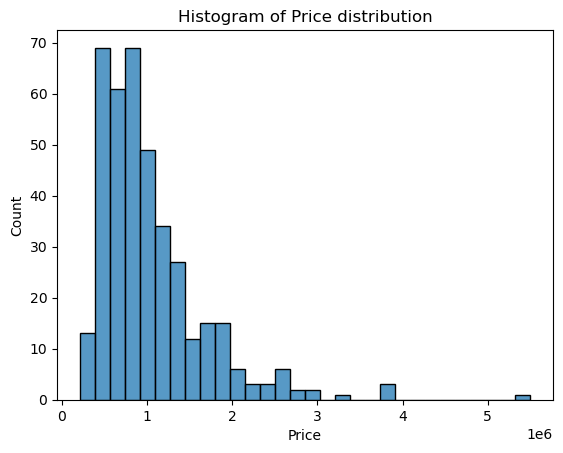

In [7]:
#Histogram
sns.histplot(data=df,x='Price')
plt.title('Histogram of Price distribution')

Distribution of price is slightly accumulated towards the left, most values are around 1e+6

Text(0.5, 1.0, 'Scatterplot of Price and Distance by Type')

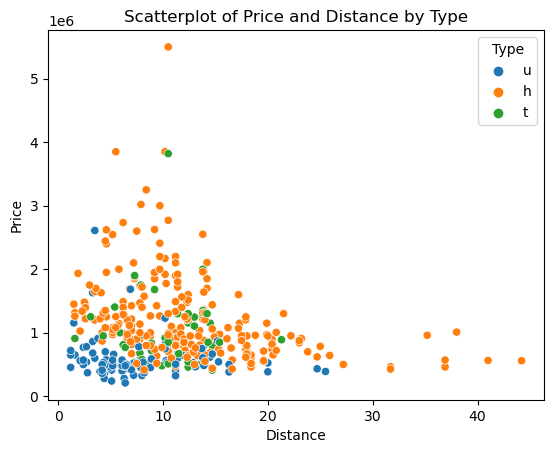

In [8]:
# scatterplot
sns.scatterplot(data=df,x='Distance',y='Price', hue = 'Type')
plt.title('Scatterplot of Price and Distance by Type')

There is no linear relation between price and distance according to the scatterplot, however we can see difference in count of different types

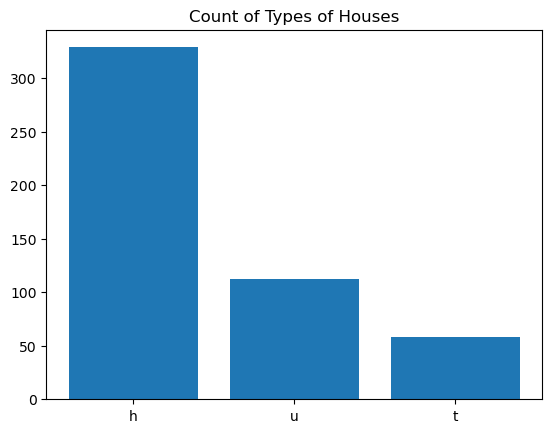

In [9]:
#bargraph
type_counts = df['Type'].value_counts()

plt.bar(x=type_counts.index, height=type_counts.values)
plt.title('Count of Types of Houses')
plt.show()

Text(0.5, 1.0, 'Boxplot of Price wrt bathroom')

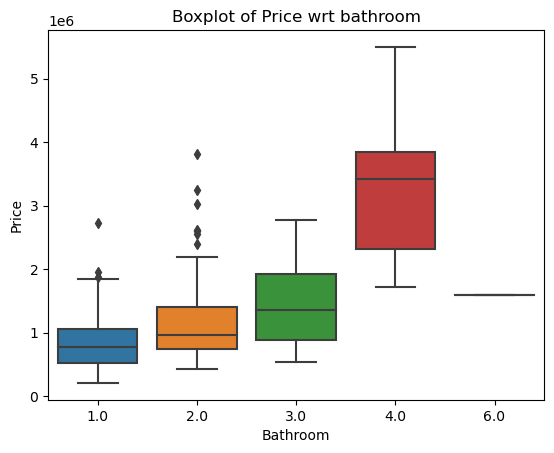

In [10]:
sns.boxplot(data=df,y='Price',x='Bathroom')
plt.title('Boxplot of Price wrt bathroom')

In this plot we can see a clear rise in price with increase in number of bathroom

In [11]:
numeric_cols = df.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'Heatmap of Correlation between variables')

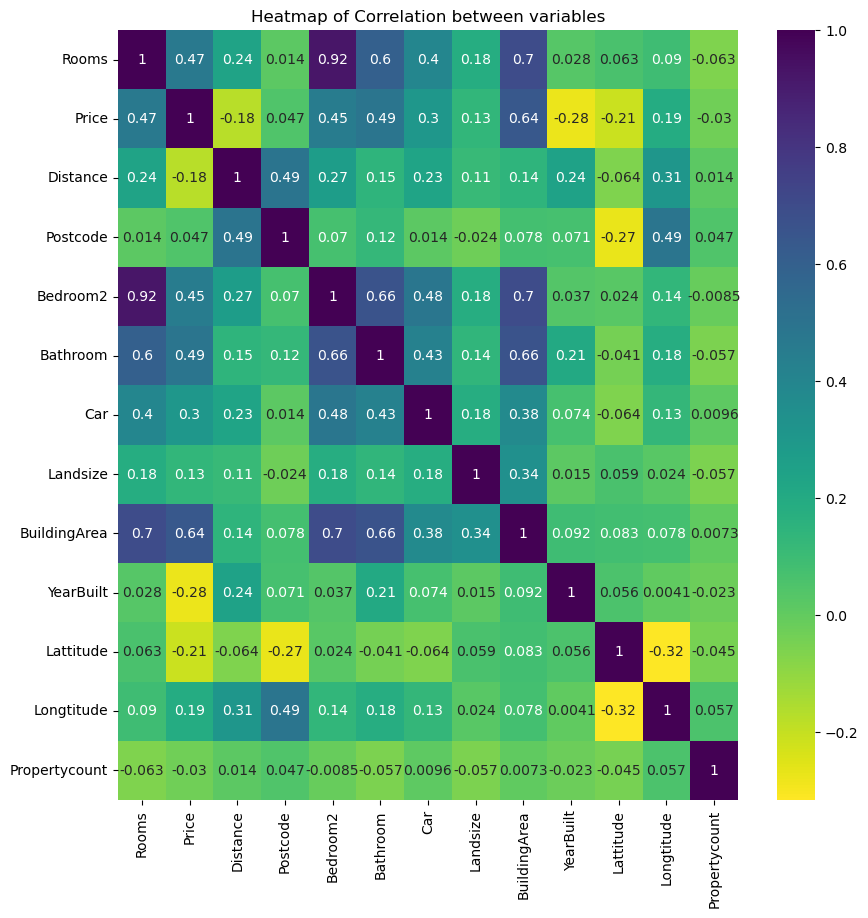

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_cols.corr(),annot=True, cmap='viridis_r')
plt.title('Heatmap of Correlation between variables')

Insights: We can see a high correlation between Bedroom2 and Rooms through this heatmap

# Q2 - Linear Regression Model Development

In [13]:
# checking for NA values in the dataset
df.isna().sum()[df.isna().sum()>0]

Price           108
Bedroom2        128
Bathroom        128
Car             137
Landsize        174
BuildingArea    310
YearBuilt       287
Lattitude       122
Longtitude      122
dtype: int64

In [14]:
# dropping columns with more than 50% NAs

# dropping Suburb,Address,SellerG,Date,Postcode as they are not required for regression model

df.drop(['BuildingArea','YearBuilt','Suburb','Address','SellerG','Date'],axis=1,inplace=True)
print(f'Shape of modified dataframe {df.shape}')

Shape of modified dataframe (499, 15)


In [15]:
# Replacing NA values in bathroom column
# here the code checks if the row value is NA and then looks for it's corresponding rooms value.Among non NA data it finds 
#the mode of batrooms with the specific rooms value and is used to replace the NA value for that particular row in the 
#bathroom column

def impute_bathroom(row):
    if pd.isna(row['Bathroom']):
        mode_bathroom = df[df['Rooms'] == row['Rooms']]['Bathroom'].mode().iloc[0]
        return mode_bathroom
    else:
        return row['Bathroom']

# Apply the imputation function to the DataFrame
df['Bathroom'] = df.apply(impute_bathroom, axis=1)

In [16]:
# Replacing NA values in Landsize

# here the code checks if the row value is NA and then looks for it's corresponding rooms value.Among non NA data it finds 
#the median of Landsize with the specific rooms value and is used to replace the NA value for that particular row in the 
#Landsize column.


def impute_landsize(row):
    if pd.isna(row['Landsize']):
        mode_landsize = df[df['Rooms'] == row['Rooms']]['Landsize'].median()
        return mode_landsize
    else:
        return row['Landsize']

# Apply the imputation function to the DataFrame
df['Landsize'] = df.apply(impute_landsize, axis=1)

In [17]:
# Replacing NA values in Car

# here the code checks if the row value is NA and then looks for it's corresponding rooms value.Among non NA data 
#it finds the mode of Car with the specific rooms value and is used to replace the NA value for that particular row in 
#the Car column.



def impute_car(row):
    if pd.isna(row['Car']):
        mode_car = df[df['Rooms'] == row['Rooms']]['Car'].mode().iloc[0]
        return mode_car
    else:
        return row['Car']

# Apply the imputation function to the DataFrame
df['Car'] = df.apply(impute_car, axis=1)


In [18]:
# dropping the column bedrooms2 since it is highly correlated to rooms, removing all the rows with NA value in price

df.drop('Bedroom2',axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.shape

(303, 14)

In [19]:
# converting all the categorical variables into dummy variables

df=pd.get_dummies(df,drop_first=True)


In [20]:
# Linear Regression
# splitting data into independent variables and dependent variable

y=df['Price']
x=df.drop('Price',axis=1)

In [21]:
# splitting data into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
print('In-sample R-square:',model_1.score(x_train,y_train))
pd.DataFrame({'Column':x.columns,'coefficient':model_1.coef_})

In-sample R-square: 0.716936078587311


,Column,coefficient
0,Rooms,1.536954e+05
1,Distance,-7.470574e+04
2,Postcode,6.911948e+02
3,Bathroom,1.858073e+05
4,Car,9.407896e+04
5,Landsize,8.595384e+01
6,Lattitude,9.437104e+05
7,Longtitude,-8.064704e+05
8,Propertycount,7.827722e+00
9,Type_t,-3.495902e+05


Preprocess the data
- To clean the data we have handled null values by various methods, we have dropped columns with more than 50% NA values, we also dropped some columns which are not necessary for prediction.
- To fill in the null values in Bathroom, and Car, we have replaced the NAs with mode of the corresponding non null room values and for column Landsize, median is used with same logic.
- We have dropped the column bedrooms2 since it is highly correlated to rooms, also removed all the rows with NA value in price

Preparing the data and developing the model.
- To prepare the data, we have converted all the categorical variables into dummy variables
- Next, splitting data into independent variables and dependent variable
- Lastly, splitting data into test and train

# Q3- Model Evaluation

In [23]:
pred_1=model_1.predict(x_test)
pred_1

array([1708475.06294081,  200741.64885637, 1431980.49629205,
        719549.56064504,  566726.23039117, 1671606.35287154,
        900801.89897704,  788850.93106416, 1946031.07206249,
       1364782.88734937, 2454398.39201617,  718790.75046286,
       1085368.62015575,  775000.20379722, 1852745.32338756,
        602030.26610366, 2040703.26400107, 1567287.94823629,
       1672968.89863172, 1267422.85339457,  460994.81963503,
        532089.64326212,  660347.06289878, 1542926.24884266,
       1479398.50188327, 2148917.4411433 , 1255787.28047124,
       1176920.29647431,  274525.02865067, 1120458.23743537,
        934882.15663871, 1213389.45915052, 1407021.84215978,
        917604.47423998,  546276.24758282,  617782.86021906,
        782856.67675492,  715759.45351699,  970469.54318467,
       1717746.149472  , 1373192.66064903, 1481081.41555539,
       1027961.22909722, 1781485.44279432,  359822.415535  ,
       1002768.59837601, 1086496.45277783, 1638428.31938773,
         66609.9342441 ,

In [24]:
print(f'In-sample R-square: {model_1.score(x_train,y_train)}\t',f'In-sample RMSE: {(mean_squared_error(y_train,model_1.predict(x_train)))**0.5}')
print(f'OOS R-square: {r2_score(y_test,pred_1)}\t',f'OOS RMSE: {(mean_squared_error(y_test,pred_1))**0.5}')

In-sample R-square: 0.716936078587311	 In-sample RMSE: 371423.5858817371
OOS R-square: 0.38872568257154505	 OOS RMSE: 423507.66243852675


Insights: We can see that the R-sq for in sample is higher than that of OOS. The difference between in-sample and out-of-sample performance indicates overfitting of model on training data that do not generalize well to OOS data, also the increase in RMSE supports the point that there might be overfitting.

Hence,we can say, the model seems to make poor predicitions of price when tested with OOS data therefore, is not a good model.

# Q4 - Regularization

Is there a need for Lasso regularization?

There's a significant difference between the in-sample and OOS R-sq values, which indicate overfitting.
Lasso can help reduce overfitting by applying a penalty to the variables which may cause overfitting.

In [25]:
# scaling the data for Lasso regression

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
from sklearn.linear_model import Lasso

alpha=np.arange(0,100,5)
alpha_r2={}
alp=[]


for i in alpha:
    model_lasso=Lasso(alpha=i)
    model_lasso.fit(x_train_scaled,y_train)
    alp.append(i)
    alpha_r2[i]=round(model_lasso.score(x_train_scaled,y_train),2)

print(alpha_r2)    

C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+13, tolerance: 1.106e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

{0: 0.72, 5: 0.72, 10: 0.72, 15: 0.72, 20: 0.72, 25: 0.72, 30: 0.72, 35: 0.72, 40: 0.72, 45: 0.72, 50: 0.72, 55: 0.72, 60: 0.72, 65: 0.72, 70: 0.72, 75: 0.72, 80: 0.72, 85: 0.72, 90: 0.72, 95: 0.72}


In [27]:
# randomly choosing alpha=10 as all are similar

model_lasso=Lasso(alpha=10)
model_lasso.fit(x_train_scaled,y_train)
pred_lasso=model_lasso.predict(x_test_scaled)

print(f'In-sample R-square: {round(r2_score(y_train,model_lasso.predict(x_train_scaled)),5)}\t',f'OOS RMSE: {(mean_squared_error(y_train,model_lasso.predict(x_train_scaled)))**0.5}')
print(f'OOS R-square: {round(r2_score(y_test,pred_lasso),5)}\t',f'OOS RMSE: {(mean_squared_error(y_test,pred_lasso))**0.5}')

In-sample R-square: 0.71694	 OOS RMSE: 371423.68954526936
OOS R-square: 0.42439	 OOS RMSE: 410967.51663808373


C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.219e+11, tolerance: 1.106e+10
  model = cd_fast.enet_coordinate_descent(


In [28]:

pd.DataFrame({'Column':x_train.columns,'coefficient':model_lasso.coef_})

,Column,coefficient
0,Rooms,140243.639346
1,Distance,-468944.069296
2,Postcode,80259.979032
3,Bathroom,144938.190459
4,Car,95584.035221
5,Landsize,38021.158417
6,Lattitude,78486.405869
7,Longtitude,-96275.542659
8,Propertycount,33774.275553
9,Type_t,-107483.347286


In [29]:
# columns with coefficient 0 are dropped in lasso
col_dropped_byLasso=x.columns[model_lasso.coef_ == 0]
print(col_dropped_byLasso)


Index(['Method_SA', 'CouncilArea_Mitchell Shire Council',
       'Regionname_Northern Victoria'],
      dtype='object')


On comparing OOS values of linear regression and lasso regression, lasso regression performs better on my model as the R-sq increased and RMSE decreased however in sample values remain the same. Lasso regression is penalizing the columns which might be overfitting my regression model.

# Q5 Out-of-sample performance

In [30]:
# splitting data into 80-20 for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(f'x train shape: {x_train.shape}\t',f'y train shape: {y_train.shape}\n',f'x test shape: {x_test.shape}\t',f'y test shape: {y_test.shape}')

x train shape: (242, 50)	 y train shape: (242,)
 x test shape: (61, 50)	 y test shape: (61,)


In [31]:
x_train = x_train.astype(float)

In [32]:
# Linear Regression
# using OLS method so that I get AIC/BIC
x_train_sm= sm.add_constant(x_train)
model_2= sm.OLS(y_train,x_train_sm).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           8.08e-37
Time:                        11:25:26   Log-Likelihood:                -3433.1
No. Observations:                 242   AIC:                             6960.
Df Residuals:                     195   BIC:                             7124.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       6.307e+07   1.58e+08      0.400      0.690   -2.48e+08    3.74e+08
Rooms                                       8.141e+04   4.64e+04      1.754      0.081   -1.01e+04    1.73e+05
Distance                                   -9.311e+04   1.26e+04     -7.399      0.000   -1.18e+05   -6.83e+04
Postcode                                      37.2556    470.992      0.079      0.937    -891.636     966.148
Bathroom                                    2.901e+05   4.76e+04      6.095      0.000    1.96e+05    3.84e+05
Car                                          1.41e+05   3.68e+04      3.830      0.000    6.84e+04    2.14e+05
Landsize                                     120.6620    121.311      0.995      0.321    -118.588     359.912
Lattitude                                   3.792e+06   1.44e+06      2.630      0.009    9.48e+05    6.64e+06
Longtitude                                  5.578e+05   1.17e+06      0.475      0.635   -1.76e+06    2.87e+06
Propertycount                                 10.4846      8.670      1.209      0.228      -6.615      27.584
Type_t                                     -3.653e+05   1.04e+05     -3.520      0.001    -5.7e+05   -1.61e+05
Type_u                                     -5.312e+05   9.05e+04     -5.871      0.000    -7.1e+05   -3.53e+05
Method_S                                    1.292e+05   9.37e+04      1.379      0.170   -5.56e+04    3.14e+05
Method_SA                                  -6.636e+05   4.77e+05     -1.391      0.166    -1.6e+06    2.77e+05
Method_SP                                   1.354e+05   1.15e+05      1.182      0.239   -9.05e+04    3.61e+05
Method_VB                                   3.594e+04   1.18e+05      0.304      0.762   -1.97e+05    2.69e+05
CouncilArea_Bayside City Council            1.985e+06      4e+05      4.968      0.000     1.2e+06    2.77e+06
CouncilArea_Boroondara City Council         8.861e+05   2.45e+05      3.619      0.000    4.03e+05    1.37e+06
CouncilArea_Brimbank City Council           6.095e+04   1.63e+05      0.374      0.709    -2.6e+05    3.82e+05
CouncilArea_Cardinia Shire Council         -2.137e-06   2.56e-06     -0.835      0.405   -7.18e-06    2.91e-06
CouncilArea_Casey City Council              2.608e+06   9.77e+05      2.670      0.008    6.81e+05    4.54e+06
CouncilArea_Darebin City Council            9.578e+04   2.52e+05      0.381      0.704      -4e+05    5.92e+05
CouncilArea_Frankston City Council          3.511e+06   8.44e+05      4.162      0.000    1.85e+06    5.17e+06
CouncilArea_Glen Eira City Council          1.046e+06   3.51e+05      2.979      0.003    3.54e+05    1.74e+06
CouncilArea_Greater Dandenong City Council    1.4e+06   6.23e+05      2.248      0.026

In [33]:
#checking r2 from sklearn matches with r2 from statsmodel

model_2=LinearRegression()
model_2.fit(x_train,y_train)
print(model_2.score(x_train,y_train))

pred_2=model_2.predict(x_test)

0.7397830041034195


In [34]:
#CV for linear regression

from sklearn.model_selection import cross_val_score as cvs

scores=cvs(model_2,x,y,cv=5,scoring='r2')
print(scores)
print('Average R-square:',np.mean(scores))

[ 0.50221487  0.27162867 -0.27712889  0.53605209  0.61008496]
Average R-square: 0.3285703395805013


In [35]:
# lasso Regression
# scaling the data for Lasso regression
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [36]:
model_lasso_2=Lasso(alpha=10)
model_lasso_2.fit(x_train_scaled,y_train)
print('In sample R-square for Lasso regression:',r2_score(y_train,model_lasso_2.predict(x_train_scaled)))
pred_lasso_2=model_lasso_2.predict(x_test_scaled)

In sample R-square for Lasso regression: 0.7397825801427669


C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.970e+11, tolerance: 1.143e+10
  model = cd_fast.enet_coordinate_descent(


In [37]:
# AIC, BIC for Lasso using statsmodels

coef=model_lasso_2.coef_
intercept=model_lasso_2.intercept_

train_mse=mean_squared_error(y_train,model_lasso_2.predict(x_train_scaled))
k = np.sum(coef != 0) + (1 if intercept != 0 else 0)
n = len(y_train)

aic = n * np.log(train_mse) + 2 * k
aic_c = aic + (2 * k * (k + 1)) / (n - k - 1)
bic = n * np.log(train_mse) + np.log(n) * k

print(f'AIC: {aic}\t',f'BIC: {bic}\t',f'AICc: {aic_c}')

AIC: 6275.35829460233	 BIC: 6442.827305457851	 AICc: 6299.731351597148


In [38]:
# AIC, BIC,AICc for Lasso OOS
oos_mse = mean_squared_error(y_test, model_lasso_2.predict(x_test_scaled))
k_1 = np.sum(model_lasso_2.coef_ != 0) + (1 if model_lasso_2.intercept_ != 0 else 0)
n_oos = len(y_test)

oos_aic = n_oos * np.log(oos_mse) + 2 * k_1
oos_aic_c = oos_aic + (2 * k_1 * (k_1 + 1)) / (n_oos - k_1 - 1)
oos_bic = n_oos * np.log(oos_mse) + np.log(n_oos) * k_1

print(f'Out-of-Sample AIC: {oos_aic}', f'Out-of-Sample BIC: {oos_bic}',f'Out-of-Sample AICc: {oos_aic_c}')

Out-of-Sample AIC: 1731.5428359965022 Out-of-Sample BIC: 1832.864781476821 Out-of-Sample AICc: 2123.542835996502


In [39]:
#OOS AIC/BIC/AICc for Linear regression model
oos_mse_lr = mean_squared_error(y_test, model_2.predict(x_test_scaled))
k_ = np.sum(model_2.coef_ != 0) + (1 if model_2.intercept_ != 0 else 0)
n_oos_lr = len(y_test)

oos_aic_lr = n_oos_lr * np.log(oos_mse_lr) + 2 * k_
oos_aic_c_lr = oos_aic_lr + (2 * k_ * (k_ + 1)) / (n_oos_lr - k_ - 1)
oos_bic_lr = n_oos_lr * np.log(oos_mse_lr) + np.log(n_oos_lr) * k_

print(f'Out-of-Sample AIC-LR: {oos_aic_lr}', f'Out-of-Sample BIC-LR: {oos_bic_lr}',f'Out-of-Sample AICc-LR: {oos_aic_c_lr}')

Out-of-Sample AIC-LR: 2288.6495745220836 Out-of-Sample BIC-LR: 2394.193267730749 Out-of-Sample AICc-LR: 2798.6495745220836


C:\Users\yajur\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
# CV for Lasso regression

from sklearn.linear_model import LassoCV

model_LassoCV=LassoCV(cv=5,random_state=5).fit(x_train_scaled,y_train)
print('Average R-square:',model_LassoCV.score(x_train_scaled,y_train))
print('Best Alpha value:',model_LassoCV.alpha_)

Average R-square: 0.7189817336434887
Best Alpha value: 6858.707576618778


In [41]:
# OOS performance by deviance

print(f'Linear Regression RMSE: {(mean_squared_error(y_test,pred_2))**0.5}\t',f'Lasso Regression RMSE: {(mean_squared_error(y_test,pred_lasso_2))**0.5}')


Linear Regression RMSE: 664569.8240524186	 Lasso Regression RMSE: 664034.1246236118


In [42]:
#in sample comparison
pd.DataFrame({'Linear Regression':[6960,7124,0.74,0.33],'Lasso Regression':[6275.36,6442.83,0.74,0.72]},index=['AIC','BIC','In-sample R2','R2(CV)'])

,Linear Regression,Lasso Regression
AIC,6960.00,6275.36
BIC,7124.00,6442.83
In-sample R2,0.74,0.74
R2(CV),0.33,0.72


In [43]:
#OOS AIC/BIC/AICc comparison
print(f'Out-of-Sample AIC-LR: {oos_aic_lr}', f'Out-of-Sample BIC-LR: {oos_bic_lr}',f'Out-of-Sample AICc-LR: {oos_aic_c_lr}')
print(f'Out-of-Sample AIC-Lasso: {oos_aic}', f'Out-of-Sample BIC-Lasso: {oos_bic}',f'Out-of-Sample AICc-Lasso: {oos_aic_c}')

Out-of-Sample AIC-LR: 2288.6495745220836 Out-of-Sample BIC-LR: 2394.193267730749 Out-of-Sample AICc-LR: 2798.6495745220836
Out-of-Sample AIC-Lasso: 1731.5428359965022 Out-of-Sample BIC-Lasso: 1832.864781476821 Out-of-Sample AICc-Lasso: 2123.542835996502


The Lasso model's OOS AIC, AICc and BIC are lower than the linear model AIC/AICc/BIC, suggesting that the Lasso model has better OOS performance. similarly in sample lasso values are also lower making it better.

The RMSEs are close for both models, with the Lasso model being slightly better.

The 5-fold CV results show a higher R-squared for the Lasso model compared to the linear model. 

The average R-sqaure value given by 5-fold CV for Lasso regression is 0.72 which is similar to eome extent with its in-sample R-square indicating that Lasso regression is not overfit and has handled the issue of overfitting in Linear Regression.

Conclusion : The Lasso model appears to be the better model here. The IC values are more favorable for the Lasso model, showing a better OOS prediction. 